### ENVELOPE SPECTRUM - HEALTHY (Fault Diameter 0.007")

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import lee_dataset_CWRU
from lee_dataset_CWRU import *
import envelope_spectrum
from envelope_spectrum import *

In [2]:
faultRates = [3.585, 5.415, 1] #[outer, inner, shaft]
Fs = 12000
DE_H1, FE_H1, t_DE_H1, t_FE_H1, RPM_H1, samples_s_DE_H1, samples_s_FE_H1 = lee_dataset('../DataCWRU/97.mat')
DE_H2, FE_H2, t_DE_H2, t_FE_H2, RPM_H2, samples_s_DE_H2, samples_s_FE_H2 = lee_dataset('../DataCWRU/98.mat')
RPM_H2 = 1778
DE_H3, FE_H3, t_DE_H3, t_FE_H3, RPM_H3, samples_s_DE_H3, samples_s_FE_H3 = lee_dataset('../DataCWRU/99.mat')
RPM_H3 = 1750
DE_H4, FE_H4, t_DE_H4, t_FE_H4, RPM_H4, samples_s_DE_H4, samples_s_FE_H4 = lee_dataset('../DataCWRU/100.mat')

In [3]:
fr_H1 = RPM_H1 / 60
BPFI_H1 = 5.4152 * fr_H1
BPFO_H1 = 3.5848 * fr_H1

In [4]:
fr_H2 = RPM_H2 / 60
BPFI_H2 = 5.4152 * fr_H2
BPFO_H2 = 3.5848 * fr_H2

In [5]:
fr_H3 = RPM_H3 / 60
BPFI_H3 = 5.4152 * fr_H3
BPFO_H3 = 3.5848 * fr_H3

In [6]:
fr_H4 = RPM_H4 / 60
BPFI_H4 = 5.4152 * fr_H4
BPFO_H4 = 3.5848 * fr_H4

In [7]:
fSpec_H1, xSpec_H1 = envelope_spectrum2(DE_H1, Fs)
fSpec_H2, xSpec_H2 = envelope_spectrum2(DE_H2, Fs)
fSpec_H3, xSpec_H3 = envelope_spectrum2(DE_H3, Fs)
fSpec_H4, xSpec_H4 = envelope_spectrum2(DE_H4, Fs)

Text(0.5, 1.0, 'Normal Baseline Data, 1730 RPM')

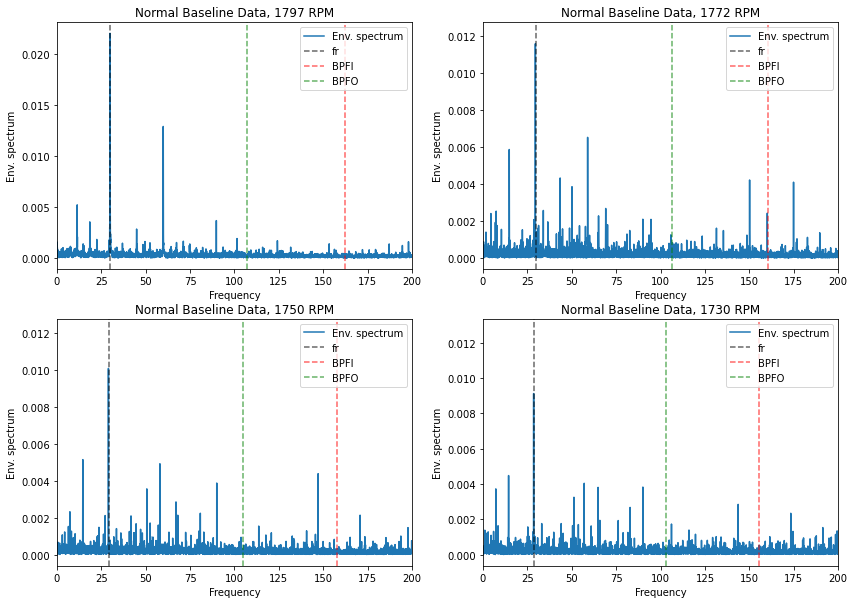

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(14, 10)
ax1.plot(fSpec_H1, xSpec_H1, label = 'Env. spectrum')
ax1.axvline(x = fr_H1, color = 'k', linestyle = '--', lw = 1.5, label = 'fr', alpha = 0.6)
ax1.axvline(x = BPFI_H1, color = 'r', linestyle = '--', lw = 1.5, label = 'BPFI', alpha = 0.6)
ax1.axvline(x = BPFO_H1, color = 'g', linestyle = '--', lw = 1.5, label = 'BPFO', alpha = 0.6)
ax1.set_xlim(0,200)
ax1.legend()
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Env. spectrum')
ax1.set_title("Normal Baseline Data, 1797 RPM")
ax2.plot(fSpec_H2, xSpec_H2, label = 'Env. spectrum')
ax2.axvline(x = fr_H2, color = 'k', linestyle = '--', lw = 1.5, label = 'fr', alpha = 0.6)
ax2.axvline(x = BPFI_H2, color = 'r', linestyle = '--', lw = 1.5, label = 'BPFI', alpha = 0.6)
ax2.axvline(x = BPFO_H2, color = 'g', linestyle = '--', lw = 1.5, label = 'BPFO', alpha = 0.6)
ax2.set_xlim(0,200)
ax2.legend()
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Env. spectrum')
ax2.set_title("Normal Baseline Data, 1772 RPM")
ax3.plot(fSpec_H3, xSpec_H3, label = 'Env. spectrum')
ax3.axvline(x = fr_H3, color = 'k', linestyle = '--', lw = 1.5, label = 'fr', alpha = 0.6)
ax3.axvline(x = BPFI_H3, color = 'r', linestyle = '--', lw = 1.5, label = 'BPFI', alpha = 0.6)
ax3.axvline(x = BPFO_H3, color = 'g', linestyle = '--', lw = 1.5, label = 'BPFO', alpha = 0.6)
ax3.set_xlim(0,200)
ax3.legend()
ax3.set_xlabel('Frequency')
ax3.set_ylabel('Env. spectrum')
ax3.set_title("Normal Baseline Data, 1750 RPM")
ax4.plot(fSpec_H4, xSpec_H4, label = 'Env. spectrum')
ax4.axvline(x = fr_H4, color = 'k', linestyle = '--', lw = 1.5, label = 'fr', alpha = 0.6)
ax4.axvline(x = BPFI_H4, color = 'r', linestyle = '--', lw = 1.5, label = 'BPFI', alpha = 0.6)
ax4.axvline(x = BPFO_H4, color = 'g', linestyle = '--', lw = 1.5, label = 'BPFO', alpha = 0.6)
ax4.set_xlim(0,200)
ax4.legend(loc = 1)
ax4.set_xlabel('Frequency')
ax4.set_ylabel('Env. spectrum')
ax4.set_title("Normal Baseline Data, 1730 RPM")

In [9]:
clasificacion_sanos = pd.DataFrame({'Señal': ['97.mat', '98.mat', '99.mat', '100.mat'],
                                   'Estado': ['Sano'] * 4,
                                   'Predicción': [clasificacion_envelope(fSpec_H1, xSpec_H1, fr_H1, BPFO_H1, BPFI_H1),
                                                 clasificacion_envelope(fSpec_H2, xSpec_H2, fr_H2, BPFO_H2, BPFI_H2),
                                                 clasificacion_envelope(fSpec_H3, xSpec_H3, fr_H3, BPFO_H3, BPFI_H3),
                                                 clasificacion_envelope(fSpec_H4, xSpec_H4, fr_H4, BPFO_H4, BPFI_H4)]})
clasificacion_sanos

,Señal,Estado,Predicción
0,97.mat,Sano,Sano
1,98.mat,Sano,Sano
2,99.mat,Sano,Sano
3,100.mat,Sano,Sano
